# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
citi=[]
cloudiness=[]
lats=[]
lngs=[]
date=[]
humidity=[]
max_temps=[]
wind_speed=[]
countries=[]
count=0
for city in cities:
    try:
        base_url=f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
        response=requests.get(base_url).json()
        cloudiness.append(response['clouds']['all'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max']* 9/5 - 459.67)
        wind_speed.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        humidity.append((response['main']['humidity']))
        date.append((response['dt']))
        count+=1
        if response['main']['humidity'] == None:
            next
        else:
            citi.append(city)
    except Exception:
        next
        

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict={'Cities':citi,
              'Country':countries,
             'Cloudiness':cloudiness,
             'Latitude':lats,
             'Longitude':lngs,
             'Dates':date,
             'Humidity':humidity,
             'Max Temperature':max_temps,
             'Wind Speed':wind_speed}

In [5]:
weather_df=pd.DataFrame(weather_dict)
weather_df

,Cities,Country,Cloudiness,Latitude,Longitude,Dates,Humidity,Max Temperature,Wind Speed
0,bluff,NZ,89,-46.60,168.33,1595280514,83,39.002,1.34
1,mataura,NZ,60,-46.19,168.86,1595280514,83,39.002,1.34
2,ushuaia,AR,4,-54.80,-68.30,1595280249,86,32.000,1.50
3,bengkulu,ID,63,-3.80,102.27,1595280515,86,76.514,2.04
4,kirakira,SB,8,-10.45,161.92,1595280515,78,76.640,3.83
...,...,...,...,...,...,...,...,...,...
541,san quintin,MX,0,30.48,-115.95,1595280583,52,76.820,9.84
542,pringsewu,ID,0,-5.36,104.97,1595280583,92,72.482,0.39
543,honghu,CN,100,29.82,113.46,1595280583,92,74.768,1.36
544,akure,NG,100,7.25,5.19,1595280583,99,70.682,1.41


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_df.to_csv('weather_data_csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

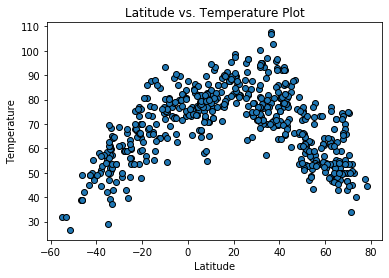

In [9]:
plt.scatter(weather_df['Latitude'],weather_df['Max Temperature'],edgecolors='black')
plt.title('Latitude vs. Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Humidity Plot

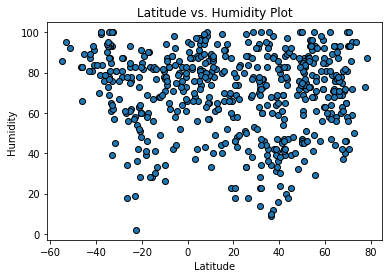

In [10]:
plt.scatter(weather_df['Latitude'],weather_df['Humidity'],edgecolors='black')
plt.title('Latitude vs. Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

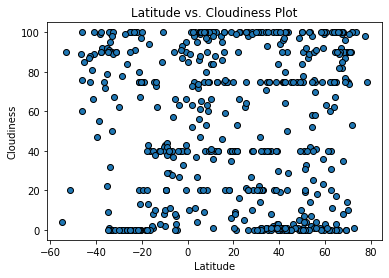

In [11]:
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'],edgecolors='black')
plt.title('Latitude vs. Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

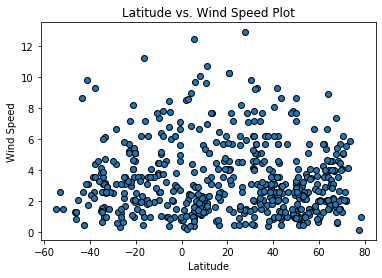

In [12]:
plt.scatter(weather_df['Latitude'],weather_df['Wind Speed'],edgecolors='black')
plt.title('Latitude vs. Wind Speed Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x,y):
    correlation = st.pearsonr(x,y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    
linear_regression(weather_df['Latitude'],weather_df['Max Temperature'])
linear_regression(weather_df['Latitude'],weather_df['Humidity'])
linear_regression(weather_df['Latitude'],weather_df['Cloudiness'])
linear_regression(weather_df['Latitude'],weather_df['Wind Speed'])

y = 0.02x + 69.01
y = -0.05x + 70.95
y = -0.03x + 51.8
y = -0.0x + 3.43


In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere=weather_df.loc[(weather_df['Latitude']>0)]
southern_hemisphere=weather_df.loc[(weather_df['Latitude']<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

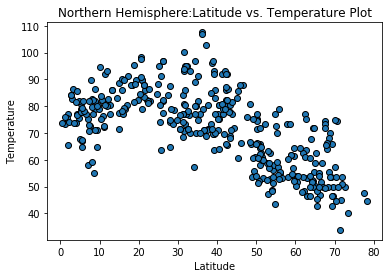

y = -0.43x + 88.18


In [15]:
plt.scatter(northern_hemisphere['Latitude'],northern_hemisphere['Max Temperature'],edgecolors='black')
plt.title('Northern Hemisphere:Latitude vs. Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
linear_regression(northern_hemisphere['Latitude'],northern_hemisphere['Max Temperature'])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

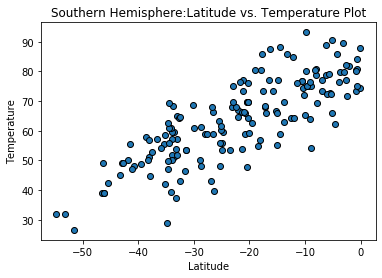

y = 0.85x + 82.68


In [16]:
plt.scatter(southern_hemisphere['Latitude'],southern_hemisphere['Max Temperature'],edgecolors='black')
plt.title('Southern Hemisphere:Latitude vs. Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
linear_regression(southern_hemisphere['Latitude'],southern_hemisphere['Max Temperature'])
# Temperature peaks north of the equater between 20 and 40 latitude and gets lower as you get further in either direction from that point. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

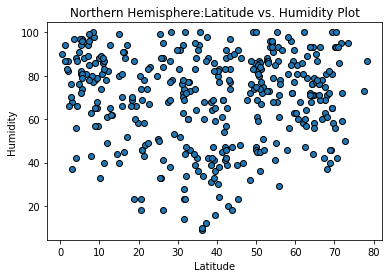

y = -0.01x + 69.58


In [17]:
plt.scatter(northern_hemisphere['Latitude'],northern_hemisphere['Humidity'],edgecolors='black')
plt.title('Northern Hemisphere:Latitude vs. Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
linear_regression(northern_hemisphere['Latitude'],northern_hemisphere['Humidity'])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

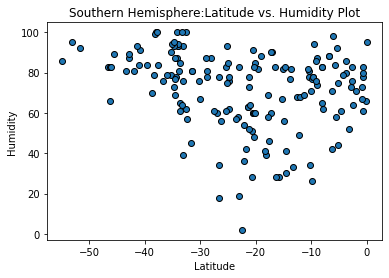

y = -0.34x + 64.18


In [18]:
plt.scatter(southern_hemisphere['Latitude'],southern_hemisphere['Humidity'],edgecolors='black')
plt.title('Southern Hemisphere:Latitude vs. Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
linear_regression(southern_hemisphere['Latitude'],southern_hemisphere['Humidity'])
#Humidity is well distributed regardless of latitude 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

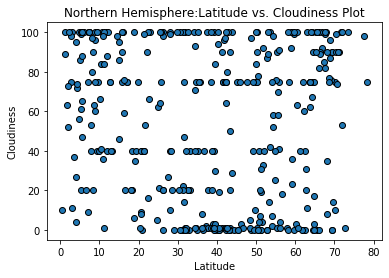

y = -0.14x + 57.6


In [19]:
plt.scatter(northern_hemisphere['Latitude'],northern_hemisphere['Cloudiness'],edgecolors='black')
plt.title('Northern Hemisphere:Latitude vs. Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
linear_regression(northern_hemisphere['Latitude'],northern_hemisphere['Cloudiness'])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

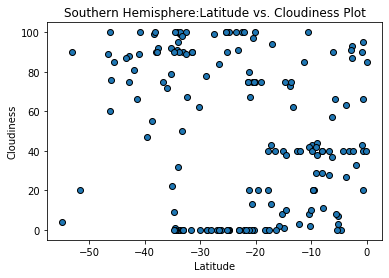

y = -0.63x + 34.92


In [20]:
plt.scatter(southern_hemisphere['Latitude'],southern_hemisphere['Cloudiness'],edgecolors='black')
plt.title('Southern Hemisphere:Latitude vs. Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
linear_regression(southern_hemisphere['Latitude'],southern_hemisphere['Cloudiness'])
# Cloudiness is reasonably well distributed regardless of latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

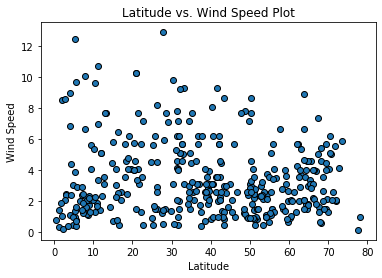

y = -0.01x + 3.78


In [21]:
plt.scatter(northern_hemisphere['Latitude'],northern_hemisphere['Wind Speed'],edgecolors='black')
plt.title('Latitude vs. Wind Speed Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
linear_regression(northern_hemisphere['Latitude'],northern_hemisphere['Wind Speed'])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

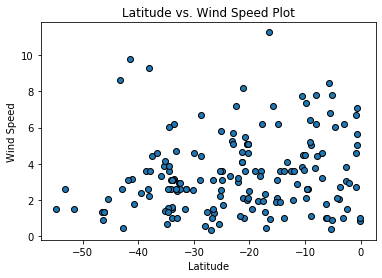

y = 0.03x + 4.03


In [22]:
plt.scatter(southern_hemisphere['Latitude'],southern_hemisphere['Wind Speed'],edgecolors='black')
plt.title('Latitude vs. Wind Speed Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
linear_regression(southern_hemisphere['Latitude'],southern_hemisphere['Wind Speed'])
# Latitude does not play a major role in wind speed. 